<a href="https://colab.research.google.com/github/khrisnaina06/UAS-AI/blob/master/Klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Obesitas Menggunakan KNN
#### *Di Buat Oleh : Muhammad Khrisna Faisal Zuhri / 312110177*

---

In [1]:
import pandas as pd
dataset_file="https://raw.githubusercontent.com/khrisnaina06/UAS-AI/refs/heads/master/dataset/Obesity%20Classification.csv"
data=pd.read_csv(dataset_file)
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [2]:
#Cek duplikasi
print(f"Terdapat data duplikasi sebanyak {data.duplicated().sum()} baris")

Terdapat data duplikasi sebanyak 0 baris


In [3]:
#Cek data kosong
data.isna().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


## Mengatasi Duplikasi dan Data Kosong

In [4]:
#Cek data kosong
data.isna().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


#Karena tidak ada baris yang duplikat, maka tidak harus ditangani
#Kalau ada data duplikat lakukan perintah
#data.drop_duplicates()

In [7]:
#Hapus kolom yang terlalu banyak kosong(null) yaitu kolom 'Cabin'
# Check if the 'Cabin' column exists before attempting to drop it
if 'Cabin' in data.columns:
  data.drop(columns=['Cabin'],inplace=True)
else:
  print("Column 'Cabin' not found in the DataFrame.")

Column 'Cabin' not found in the DataFrame.


In [8]:
#Imputasi data numerik yaitu kolom 'Age'
mean=data.Age.mean()
data.Age.fillna(int(mean),inplace=True)

<ipython-input-8-e1d226b9a9a1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Age.fillna(int(mean),inplace=True)


In [11]:
#Imputasi data kategori yaitu kolom 'Embarked'
#Cek data yang paling sering muncul
data.Label.value_counts()

,count
Label,
Underweight,47
Normal Weight,29
Overweight,20
Obese,12


In [13]:
#Berdasarkan data diatas, maka data yang sering muncul adalah 'S'
# Check if 'Embarked' column exists before filling NaN values
if 'Embarked' in data.columns:
    data.Embarked.fillna('S', inplace=True)
else:
    print("Column 'Embarked' not found in the DataFrame.")

Column 'Embarked' not found in the DataFrame.


In [14]:
data.isna().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [15]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [ ]:
#target :Label
#features : ID, Age,	Gender,	Height,	Weight,	BMI,	Label

### Analisa Data Target

In [18]:
data.Label.value_counts()

,count
Label,
Underweight,47
Normal Weight,29
Overweight,20
Obese,12


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

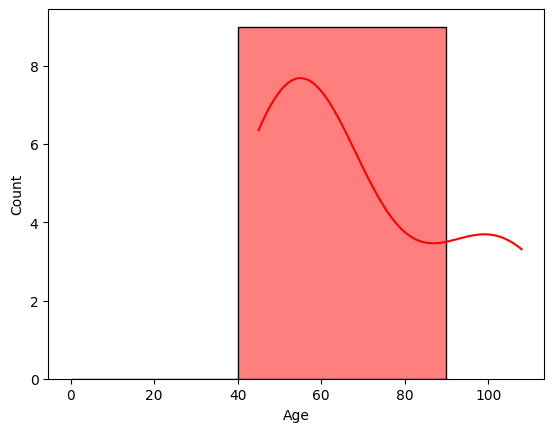

In [19]:
sns.histplot(data.Age[data.Label == 'Obese'], bins=[0,12,20,40,90], color='red', label='Obesitas', kde=True)
sns.histplot(data.Age[data.Label == 'Normal'], bins=[0,12,20,40,90], color='green', label='Normal', kde=True)

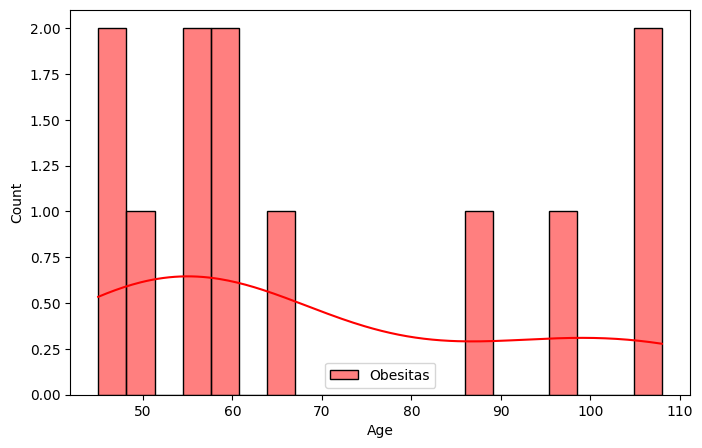

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(data.Age[data.Label == 'Obese'], bins=20, color='red', label='Obesitas', kde=True)
sns.histplot(data.Age[data.Label == 'Normal'], bins=20, color='green', label='Normal', kde=True)
plt.legend()
plt.show()

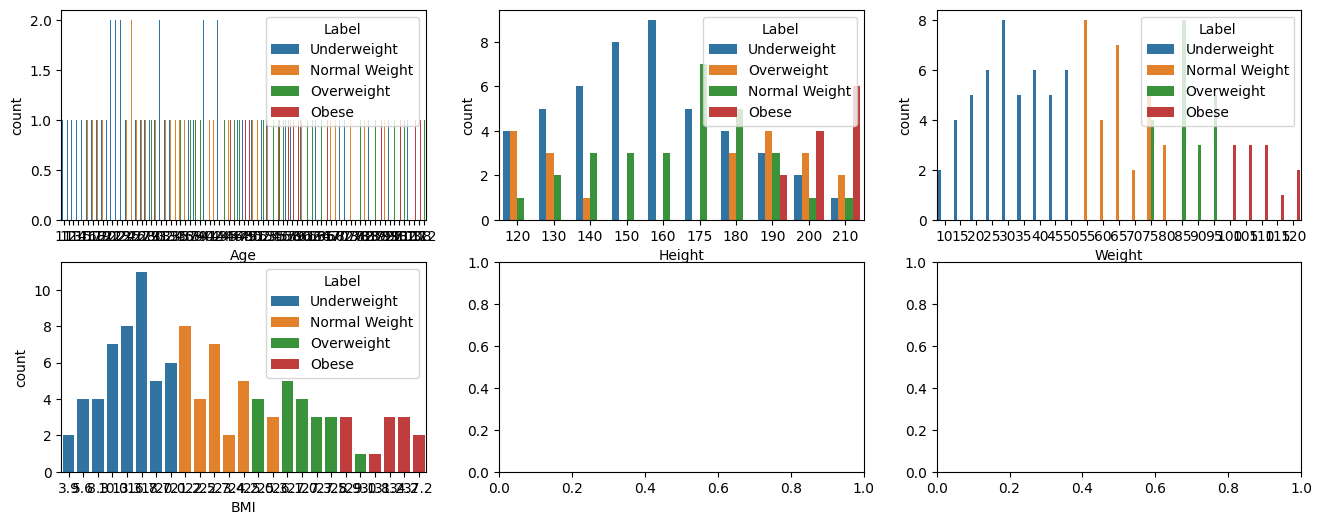

In [21]:
cate_cols = ['Age', 'Height', 'Weight', 'BMI']  # Ganti dengan kolom kategori yang relevan di dataset obesitas

fig, axs = plt.subplots(2, 3, figsize=(16, 6))

for col, ax in zip(cate_cols, axs.flatten()):
    sns.countplot(data=data, x=col, hue='Label', ax=ax)